# Week 13 Assignment - Scikit-Learn

* Create a pandas DataFrame with a subset of the comns in the dataset. You should include the column that indicates __edible or poisonous__, the column that includes __odor__, and at least one other column of your choosing.
    
* Add meaningful names for each column.
    
* Replacthe codes used in the data with numeric values—for example, in the first “target” column, “e” might become 0 and “p” might become 1. This is because your downstream processing in Project 4 using scikit-learn requires that values be stored as numerics.
    
* Perform exploratory data analysis: show the distribution of data for each of the columns you selected, and show scatterplots for edible/poisonous vs. odor as well as the other column that you selected.
    
* Include some text describing your preliminary conclusions about whether either of the other columns could be helpful in predicting if a specific mushroom is edible or poisonous.

In [60]:
# Display the plots inside this notebook
%matplotlib inline
# import matplotlib for graphics
import matplotlib.pyplot as plt
# import seaborn for graphics
import seaborn as sns
import numpy as np
import pandas as pd
#set some pandas options controling output format
pd.set_option('display.notebook_repr_html',True) # output as flat text and not HTML
pd.set_option('display.max_rows', None) # this is the maximum number of rows we will display
pd.set_option('display.max_columns', None) # this is the maximum number of rows we will display

In [61]:
# Part 1 
# read in the 'class', 'odor', and 'cap-color' columns
#    these are columns 0 for class, 3 for cap-color, and 5 for odor.
# Part 2
# Add meaningful names to each column. 
#    I chose 'poisonous' for if it's poisonous, 'cap-color, for cap-color, and 'odor' for odor.
dfFungi = pd.read_csv("data/agaricus-lepiota.data.txt", \
                      header = None, \
                      usecols = [0, 3, 5,], \
                      names = ['poisonous', 'cap-color', 'odor'])

In [62]:
# display the dataframe
dfFungi.head(5)

,poisonous,cap-color,odor
0,p,n,p
1,e,y,a
2,e,w,l
3,p,w,p
4,e,g,n


In [63]:
# I'm creating a dictionary to hold the values for the replacement
# of the strings to integers. For the edible column I'm using :
# 0 : if it IS NOT poisonous (edible), and 
# 1 : if it IS poisonous.
dictNewValues = {
    'e' : 0, \
    'p' : 1
}

# replace the cell values with the values in the dictionary
dfFungi.replace({'poisonous': dictNewValues}, inplace=True)

# review the dataframe
dfFungi.head(5)

,poisonous,cap-color,odor
0,1,n,p
1,0,y,a
2,0,w,l
3,1,w,p
4,0,g,n


In [64]:
# simmilarly to the edible column I am using the same dictionary variable 
# for the cap-color dictionary
# brown=n = 0
# buff=b = 1
# cinnamon=c = 2
# gray=g = 3
# green=r = 4
# pink=p = 5
# purple=u = 6
# red=e = 7
# white=w = 8
# yellow=y = 9

dictNewValues = {
    'n' : 0, \
    'b' : 1, \
    'c' : 2, \
    'g' : 3, \
    'r' : 4, \
    'p' : 5, \
    'u' : 6, \
    'e' : 7, \
    'w' : 8, \
    'y' : 9, \
}

# replace the cell values with the values in the dictionary
dfFungi.replace({'cap-color': dictNewValues}, inplace=True)

# review the dataframe
dfFungi.head(5)

,poisonous,cap-color,odor
0,1,0,p
1,0,9,a
2,0,8,l
3,1,8,p
4,0,3,n


In [65]:
# simmilarly to the other columns I am using the same dictionary variable 
# for the odor dictionary
# almond=a = 0
# anise=l = 1
# creosote=c = 2
# fishy=y = 3
# foul=f = 4
# musty=m = 5
# none=n = 6
# pungent=p = 7
# spicy=s = 8

dictNewValues = {
    'a' : 0, \
    'l' : 1, \
    'c' : 2, \
    'y' : 3, \
    'f' : 4, \
    'm' : 5, \
    'n' : 6, \
    'p' : 7, \
    's' : 8
}

# replace the cell values with the values in the dictionary
dfFungi.replace({'odor': dictNewValues}, inplace=True)

# review the dataframe
dfFungi.head(5)

,poisonous,cap-color,odor
0,1,0,7
1,0,9,0
2,0,8,1
3,1,8,7
4,0,3,6


In [66]:
# display the data types of the columns
dfFungi.dtypes

poisonous    int64
cap-color    int64
odor         int64
dtype: object

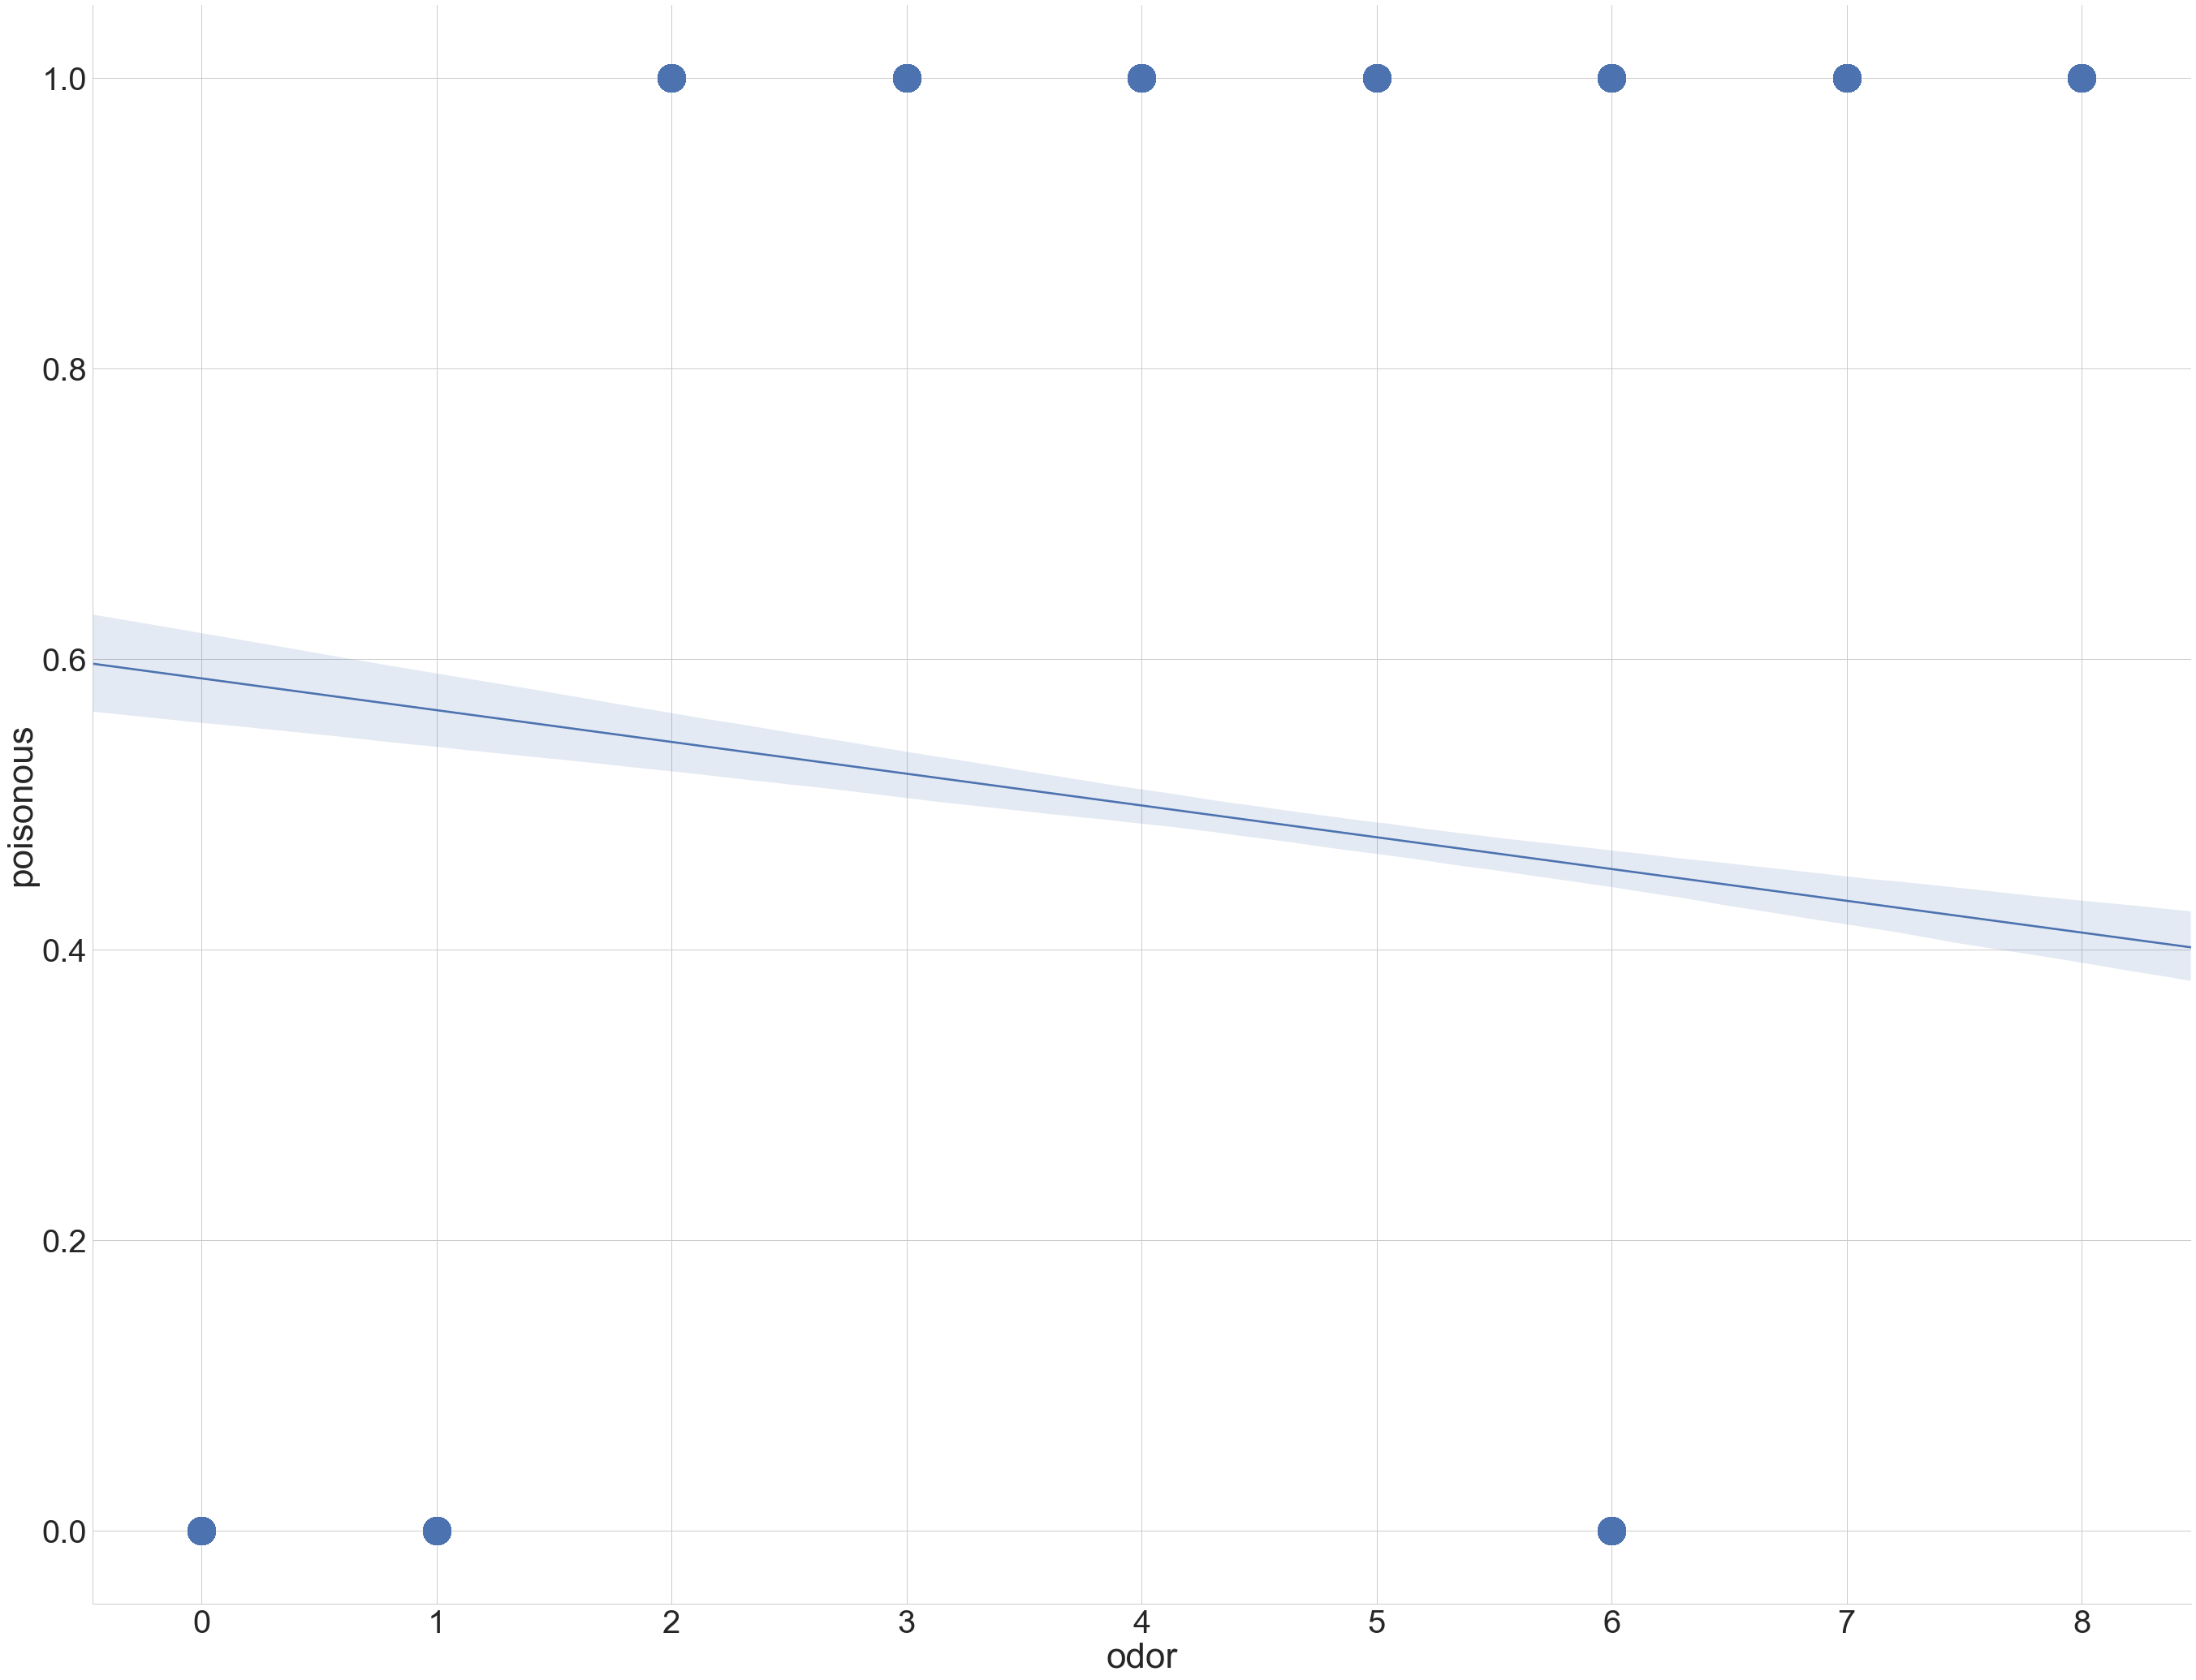

In [73]:
# Create a scatterplot that shows the relationship between odor and poisonous

# Set the seaborn grid type to whitegrid. Whitegrid displays sightlines, font_scale set the font size.
sns.set(style='whitegrid',font_scale=4)

# Use pastel colors for the plot
sns.set_color_codes('pastel')

sns.lmplot('odor', 'poisonous', data=dfFungi, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('Output/Poisonous v cap-color.pdf')

## Conclusions Based on Mushroom Odor:
It appears that odor can be an effective indicator as to weather or not a mushroom is edible. This is because odors 'almond' (0), and 'anise' (l) are both __not__ poisonous. All other mushorroms should be avoided because they are poisonous. With the exception of those with an odor of 'none' (6) which is not an accurate predictor of edibility.

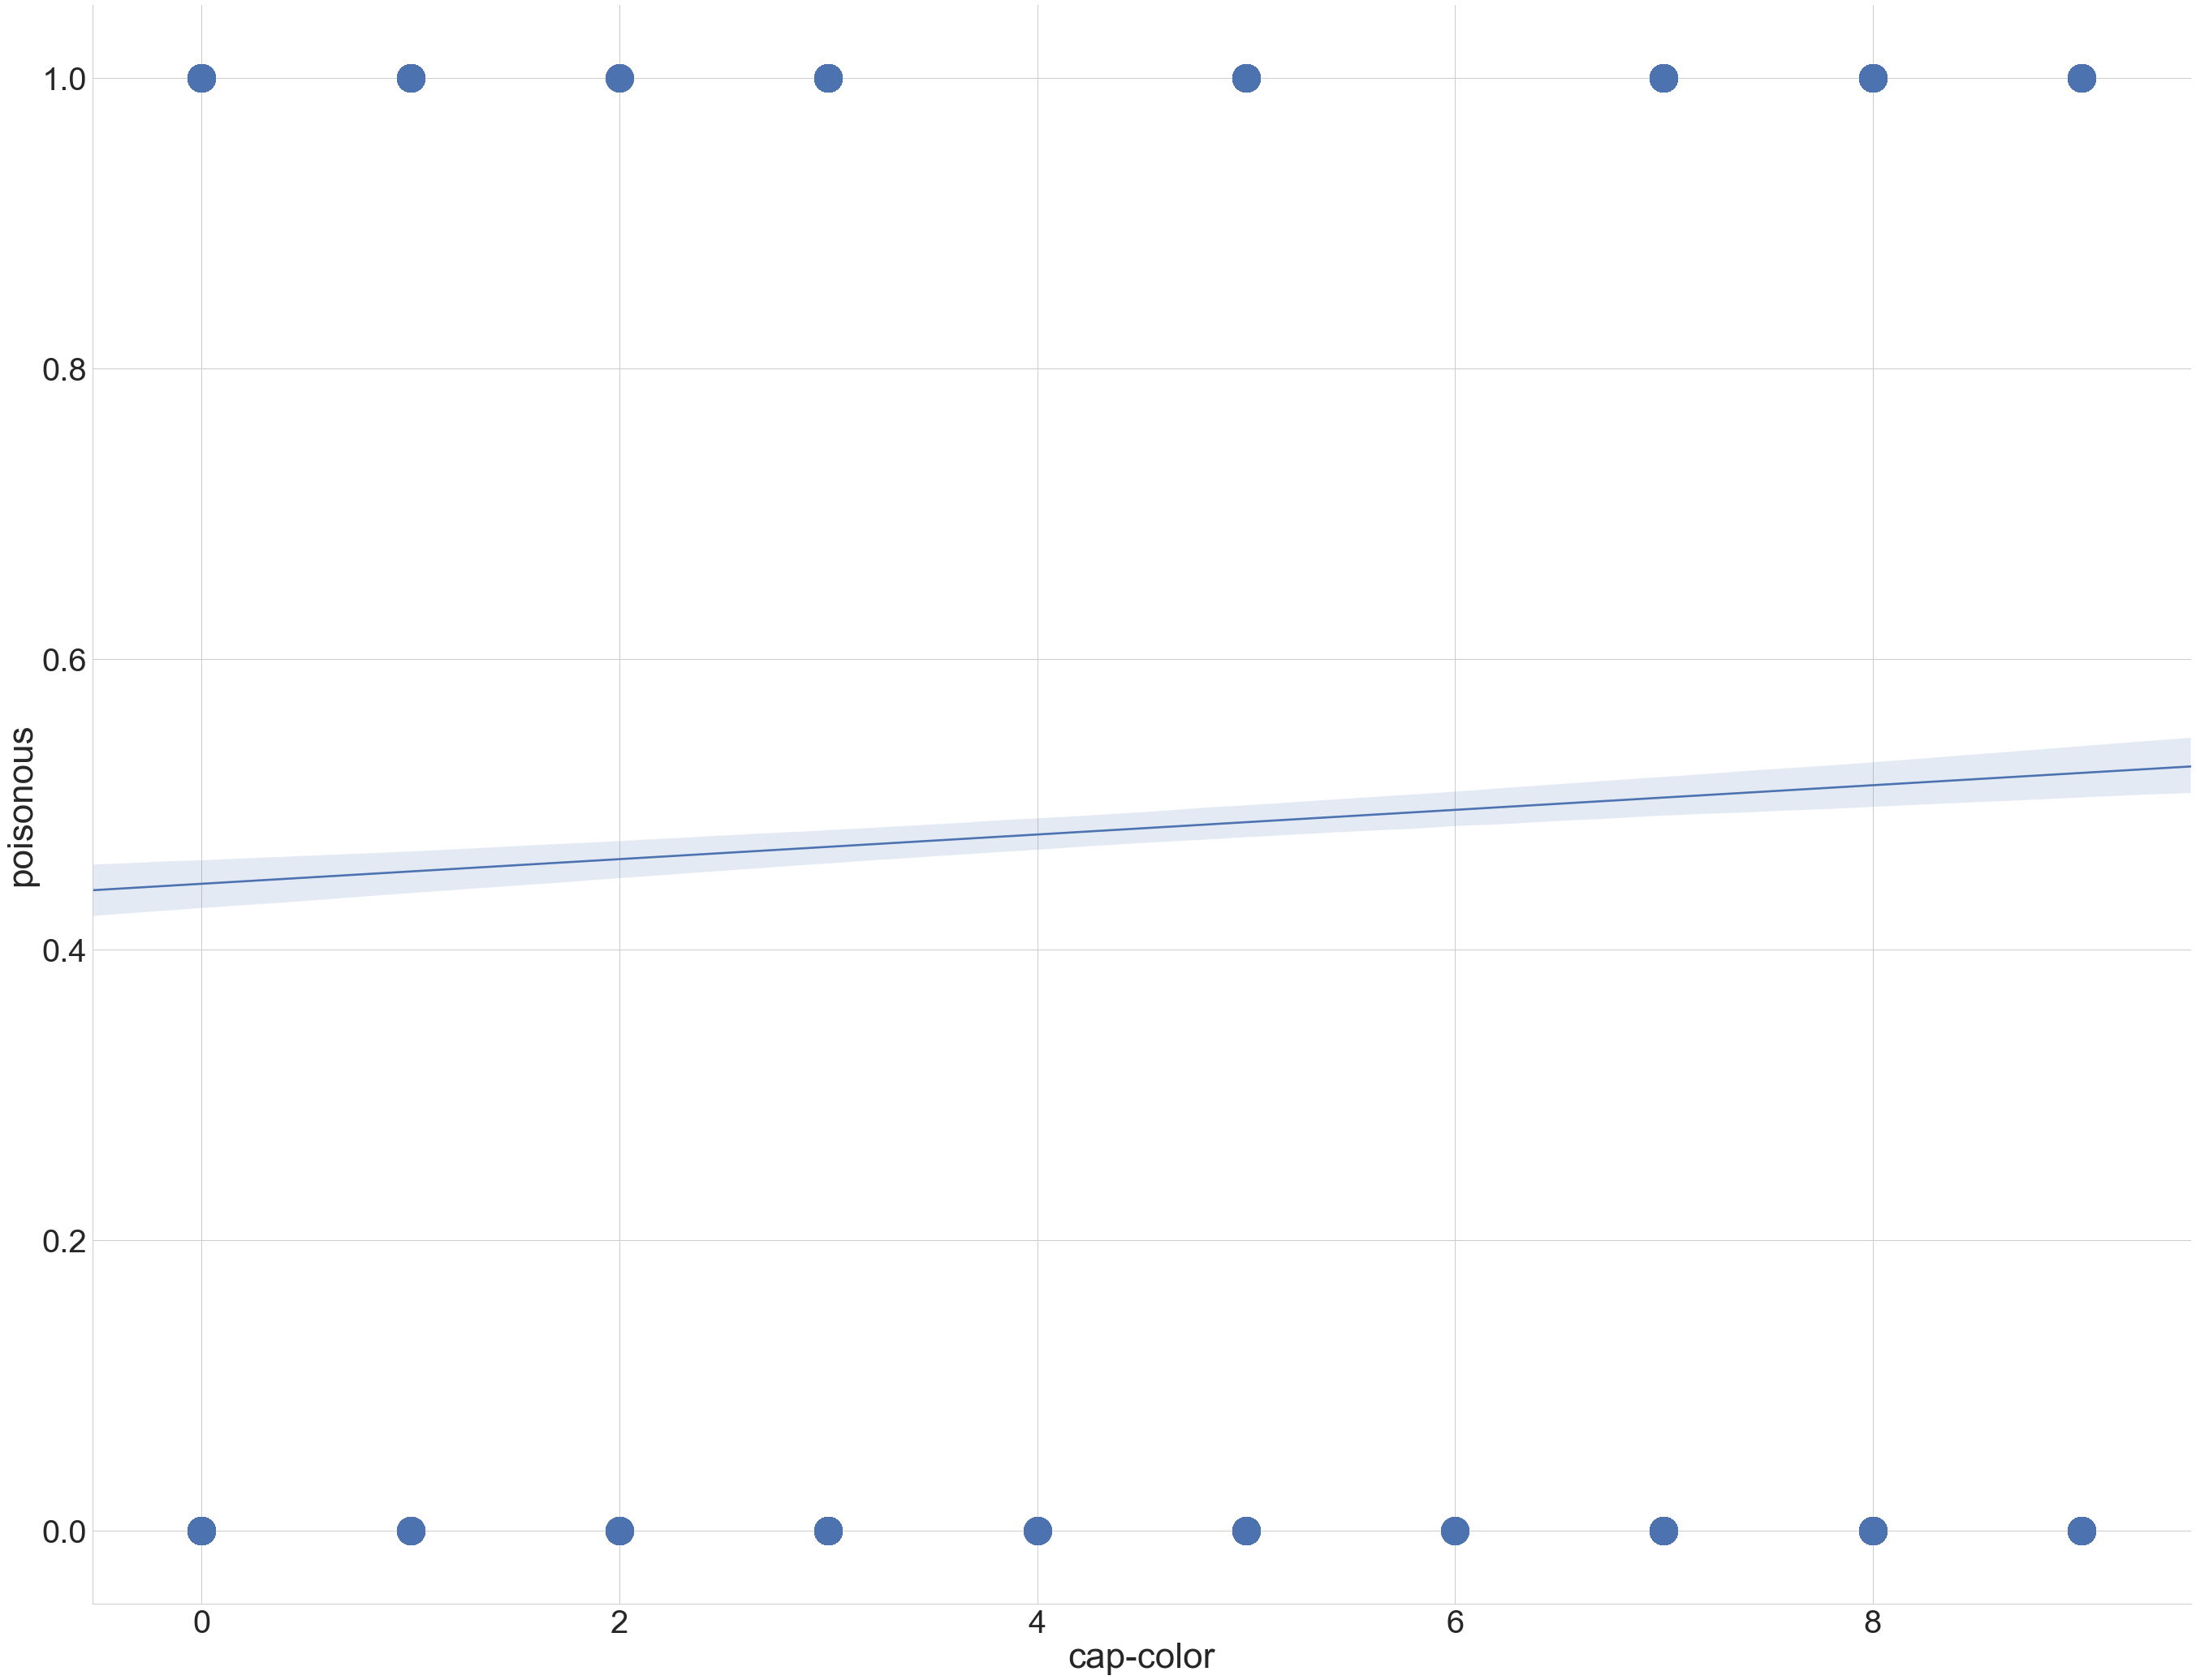

In [72]:
# Create a scatterplot that shows the relationship between cap-color and poisonous

sns.lmplot('cap-color', 'poisonous', data=dfFungi, size=30, aspect=1.294, scatter_kws={"s": 1200}).savefig('Output/Poisonous v cap-color.pdf')

## Conclusions based on Mushroom Cap Color:
It appears that cap color can be an effective indicator as to weather or not a mushroom is edible. This is because colors 'green' (4), and 'purple' (6) are both __not__ poisonous. However all other mushrooms should be avoided if one is only judging edibility based on color. This is because every other color has both edible and poisonous mushrooms.